In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#extract the base filename
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))
# split the filename 
    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')
# select 0 for male and 1 for female
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1
    #The code converts the finger information to numerical representations.
    #Each finger type is mapped to a numeric value (0, 1, 2, 3, 4).
    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

The function extract_label processes the filename to extract gender, left/right, and finger information and converts them to numerical representations. It is used to prepare the label information for fingerprint data in a dataset, making it easier to use in machine learning models for classification tasks.

In [3]:
img_size = 96  

def loading_data(path,boolean):
    #a flag to indicate if the data is from the training set or not and store in a list
    data = []
    for img in os.listdir(path):# loop to iterate through each file in the specified directory
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)
#After processing all the images,return the data list,
            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

In [4]:
#LOAD THE DATASET
Real_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Real"
Easy_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Easy"
Medium_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Medium"
Hard_path = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Altered\\Altered-Hard"

Easy_data = loading_data(Easy_path,True)
# to loop through the altered medium and hard sub folders
"""Medium_data = loading_data(Medium_path, False)
Hard_data = loading_data(Hard_path, False)"""

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


'Medium_data = loading_data(Medium_path, False)\nHard_data = loading_data(Hard_path, False)'

In [5]:
#separate the labels and image features into separate lists (labels and img).
img, labels = [], []
for label, feature in Easy_data:
    labels.append(label)
    img.append(feature)
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
#the code normalizes the pixel values of the images by dividing each pixel value by 255
#number of images will be automatically calculated based on the length of the img list.
train_data = train_data / 255.0

In [6]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(labels, num_classes=2)

In [7]:
# Convert `labels` list to a NumPy array
labels = np.array(labels)
# Now, you have `train_data`, `train_labels`, and `labels` ready for further use
# `train_data` contains the normalized image features
# `train_labels` contains the one-hot encoded labels
# `labels` contains the original label values

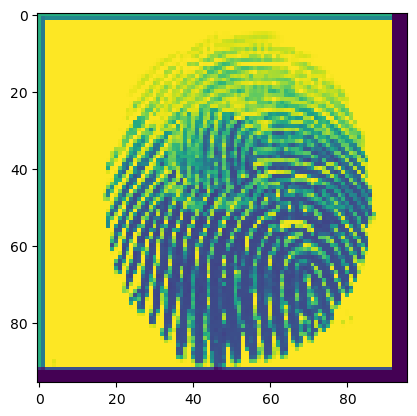

In [8]:
# Now, you can display the image at index 1000 using plt.imshow()
plt.imshow(train_data[1000])

In [9]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Create a Sequential model
model = Sequential([
    # First Convolutional layer with 32 filters, kernel size 3x3, 'relu' activation, and 'he_uniform' weight initialization.
    Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=[96, 96, 1]),
    # MaxPooling layer to reduce the spatial dimensions by 2x2
    MaxPooling2D(2),
    # Second Convolutional layer with 32 filters, kernel size 3x3, 'relu' activation, and 'he_uniform' weight initialization.
    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
    # MaxPooling layer to reduce the spatial dimensions by 2x2
    MaxPooling2D(2),
    # Flatten layer to convert 2D feature maps into a 1D vector
    Flatten(),
    # Fully connected Dense layer with 128 neurons, 'relu' activation, and 'he_uniform' weight initialization.
    Dense(128, kernel_initializer='he_uniform', activation='relu'),
    # Output Dense layer with 1 neuron and 'sigmoid' activation for binary classification.
    Dense(1, activation='sigmoid'),
])

# Print the model summary to see the architecture and the number of parameters.
model.summary()

# Compile the model with Adam optimizer, binary cross-entropy loss for binary classification, and accuracy as the evaluation metric.
model.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to stop training if the validation loss doesn't improve for 10 epochs.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
#print the data type of the labels variable.
type(labels)


numpy.ndarray

In [11]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 2, 
        #25% of the training data will be used for validation.
          validation_split = 0.25, callbacks = [early_stopping_cb], verbose = 1)


Epoch 1/2
106/106 [==============================] - 202s 2s/step - loss: 0.9728 - accuracy: 0.7858 - val_loss: 0.4921 - val_accuracy: 0.7867
Epoch 2/2
106/106 [==============================] - 192s 2s/step - loss: 0.4516 - accuracy: 0.8003 - val_loss: 0.4798 - val_accuracy: 0.7867


The number of times the entire training dataset is passed through the model. 
Each epoch consists of one full forward and backward pass.
The fraction of the training data to be used as validation data
verbose=1 means it will display progress bars for each epoch.
The model.fit method will train the model using the provided data and return a history object that contains information about the training process, such as loss and accuracy values at each epoch. This object can be used for further analysis or plotting.
the model will be trained, and you can use the history object to visualize the training process

In [33]:
# load the test data using the loading_data
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)
# Now you can proceed with the rest of your code, such as converting x_test and y_test to NumPy arrays and normalization if needed.

1000
2000
3000
4000
5000
6000


 use the trained model to predict the labels of the test data and evaluate the model's performance on the test set. 

In [40]:

# Make predictions on the test data
predictions = model.predict(x_test)

# Convert probabilities to predicted labels (0 for "Real" and 1 for "Altered")
predicted_labels = (predictions >= 0.5).astype(int).flatten()

# Evaluate the model's performance on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predicted_labels)
confusion_mat = confusion_matrix(y_test, predicted_labels)
classification_rep = classification_report(y_test, predicted_labels)

print(f"Test Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)


188/188 [==============================] - 14s 72ms/step
Test Accuracy: 0.8985
Confusion Matrix:
[[4673   97]
 [ 512  718]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4770
           1       0.88      0.58      0.70      1230

    accuracy                           0.90      6000
   macro avg       0.89      0.78      0.82      6000
weighted avg       0.90      0.90      0.89      6000



In [41]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [42]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 13s 68ms/step - loss: 52.6334 - accuracy: 0.8985


[52.63343811035156, 0.8985000252723694]

188/188 [==============================] - 13s 71ms/step
6000


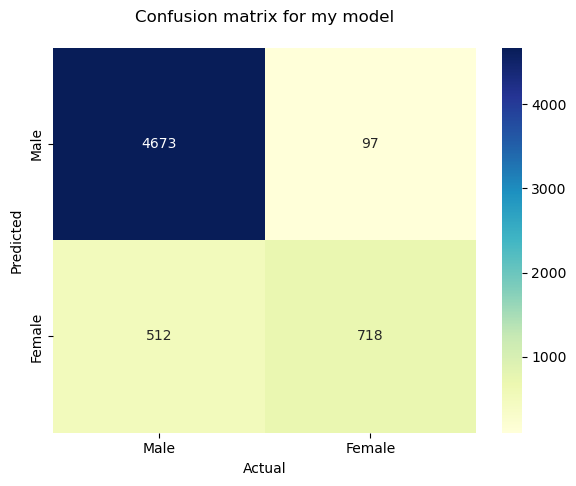

In [43]:

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for my model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))

In [45]:
 #saves the entire model, including the architecture, optimizer state, and learned weights, 
#into a single HDF5 file, format is a popular file format for storing large datasets.
model.save('GenderFP.h5')

In [ ]:
"""from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('GenderFP.h5')

# Now you can use the loaded_model for predictions or further training.
"""

True:  0
1/1 [==============================] - 0s 101ms/step
predicted:  [0.]



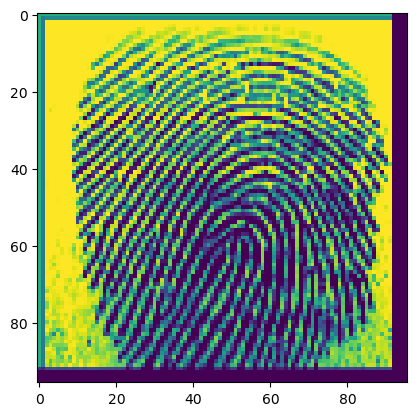

True:  0
1/1 [==============================] - 0s 63ms/step
predicted:  [0.]



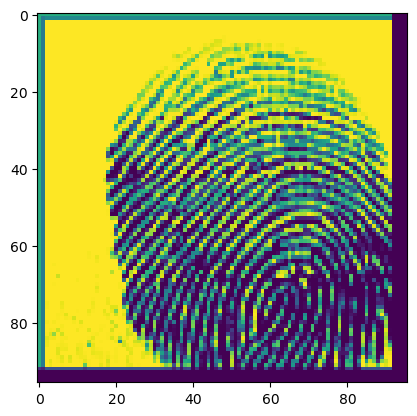

In [51]:
# get the true labels, model predictions, and visualizations for the first 2 samples in the test set
for i in range(2):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(x_test[i],0))[0])
    print()
    plt.imshow(x_test[i])
    plt.show()

In [61]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('GenderFP.h5')

# Assuming you have a new fingerprint image `new_fingerprint` that you want to predict the gender for
# Preprocess the new fingerprint image to match the format used during training
import cv2
test_fingure = cv2.imread("fingerprint_datasets/Altered/Altered-Hard/1__M_Left_index_finger_CR.BMP", cv2.IMREAD_GRAYSCALE)
test_fingure = cv2.resize(test_fingure, (96, 96))
test_fingure = test_fingure/ 255.0

# Expand the dimensions to form a batch of size 1
test_fingure_batch = test_fingure.reshape(1, 96, 96, 1)

# Use the loaded_model to predict the gender of the new fingerprint
prediction = loaded_model.predict(test_fingure_batch)

# Interpret the model's output
finger_types = ['thumb', 'index', 'middle', 'ring', 'little']
predicted_finger_index = predictions.argmax(axis=1)[0]
predicted_finger_type = finger_types[predicted_finger_index]

print("Predicted Finger Type:", predicted_finger_type)
# Interpret the model's output
if prediction[0][0] >= 0.5:
    print("Predicted Gender: Female")
else:
    print("Predicted Gender: Male")


1/1 [==============================] - 0s 109ms/step
Predicted Finger Type: thumb
Predicted Gender: Male
